# Datasets processing

### TAMPERE17 dataset (all images are 512*512)
https://webpages.tuni.fi/imaging/tampere17/

### USC-SIPI dataset (images can have 256-1024 size)
https://www.kaggle.com/luffyluffyluffy/the-uscsipi-image-database

* Datasets archieves are assumed to be in the current directory
* The following code creates the following folder structure:
    - current_dir/datasets/TAMPERE17/all_files
    - current_dir/datasets/USC-SIPI/all_files

In [1]:
from pathlib import Path
import os
import glob
import cv2

# TAMPERE 17

TAMPERE17_PATH = Path("./tampere17_grayscale.zip") # archieve path
TAMPEPE17_DIR = Path("./datasets/TAMPERE17/") # target directory

# check if archieve exists
if TAMPERE17_PATH.is_file():
    print('Archieve already loaded')
else:
    raise FileNotFoundError('Please, download required arcieve')

# check if dataset extracted
if TAMPEPE17_DIR.is_dir():
    print('Dataset already exists')
else:
    # extract all entires ignoring folder structure
    !unzip -qj tampere17_grayscale.zip -d ./datasets/TAMPERE17
    print('Dataset has been unarchieved')

Archieve already loaded
Dataset already exists


In [2]:
# USC_SIPI
# the same as for TAMPERE 17

USC_SIPI_PATH = Path("./archive.zip")
USC_SIPI_DIR = Path("./datasets/USC_SIPI/")

if USC_SIPI_PATH.is_file():
    print('Archieve already loaded')
else:
    raise FileNotFoundError('Please, download required arcieve')

if USC_SIPI_DIR.is_dir():
    print('Dataset already exists')
else:
    !unzip -qj archive.zip -d ./datasets/USC_SIPI 
    print('Dataset has been unarchieved')

Archieve already loaded
Dataset already exists


# Remove all images $\neq 512*512$ from USC_SIPI

In [3]:
path = 'datasets/USC_SIPI/'
file_list = glob.glob(path + "*")

for img_path in file_list:
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    if img.shape != (512,512):
        os.remove(img_path)

# Data loader

https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from dataloader import CustomDataset

In [6]:
# path to dataset images
path = 'datasets/USC_SIPI/'
# create dataset
usc_sipi_set = CustomDataset(path)
# create dataloader
usc_sipi_loader = DataLoader(usc_sipi_set, batch_size=3, shuffle=True)
# test dataloader
for imgs, labels in usc_sipi_loader:
    print("Batch of images has shape: ",imgs.shape)
    print("Batch of labels has shape: ", labels)
    plt.imshow(imgs[0,:,:],cmap='gray')
    break
print('Dataset length =',len(usc_sipi_set))

NameError: name 'cv2' is not defined

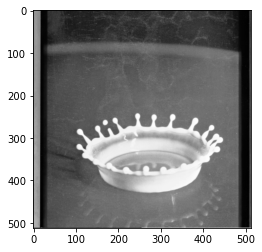

In [8]:
plt.imshow(usc_sipi_set[labels[0]][0],cmap='gray')

Dataset length = 300
Batch of images has shape:  torch.Size([3, 512, 512])
Batch of labels has shape:  tensor([287,  40,  82])


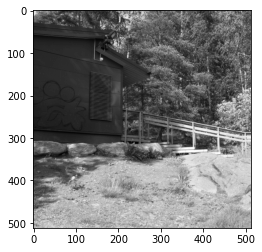

In [9]:
# the same
path = 'datasets/TAMPERE17/'
tampere17_set = CustomDataset(path)
tampere17_loader = DataLoader(tampere17_set, batch_size=3, shuffle=True)

for imgs, labels in tampere17_loader:
    print("Batch of images has shape: ",imgs.shape)
    print("Batch of labels has shape: ", labels)
    plt.imshow(imgs[0,:,:],cmap='gray')
    break
print('Dataset length =',len(tampere17_set))

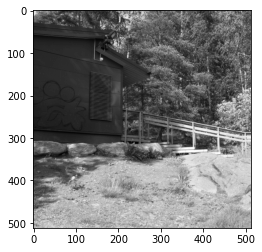

In [10]:
plt.imshow(tampere17_set[labels[0]][0],cmap='gray')